<a href="https://colab.research.google.com/github/jdy5294/Bigdata_Analyst/blob/main/2_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%EA%B0%9C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 데이터 전처리 유형
- 결측치 처리
- 이상치 처리
- 데이터 변환: 범주형, 일반 정규화, Z-score 정규화, 로그 변환, 역수 변환
- 데이터 축소
- 샘플링
- 훈련 데이터와 테스트 데이터

### 2. 데이터 변환


#### 2-1. 표준정규화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# N(53.9, 25) 따르는 한국인 1000명의 육류소비량 데이터 생성
meat_consumption_korean = 5*np.random.randn(1000) + 53.9
# N(32.7, 16) 따르는 일본인 1000명의 육류소비량 데이터 생성
meat_consumption_japan = 4*np.random.randn(1000) + 32.7

meat_consumption = pd.DataFrame({'한국인': meat_consumption_korean, '일본인': meat_consumption_japan})

meat_consumption.head()

,한국인,일본인
0,57.956211,29.328622
1,56.190045,32.384020
2,55.722379,34.273509
3,52.893001,33.081545
4,54.764061,28.336417


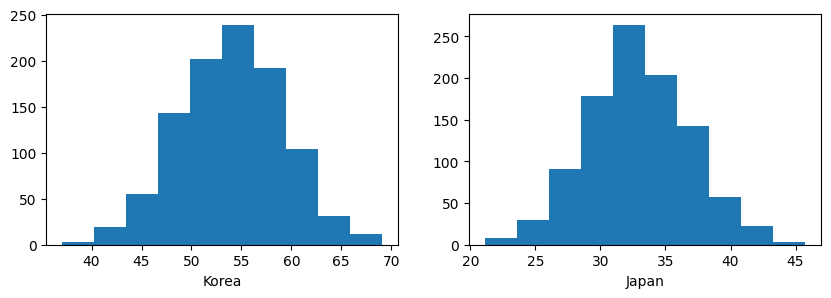

In [2]:
plt.figure(figsize=(10,3))

# 한국인 육류소비량 히스토그램
plt.subplot(121)
plt.hist(meat_consumption_korean)
plt.xlabel('Korea')

# 일본인 육류소비량 히스토그램
plt.subplot(122)
plt.hist(meat_consumption_japan)
plt.xlabel('Japan')
plt.show()

##### 2-1-1. z-표준화

- z-표준화: (변수값 - 평균)/표준편차
  1. (x - np.mean(x)) / np.std(x)
  2. scipy 패키지의 zscore() 함수
  3. sckit-learn 패키지의 StandardScaler()

In [3]:
# 표준정규화함수에 의한 변환 zscore() 함수 이용
import scipy.stats as ss

meat_consumption['한국인_정규화'] = ss.zscore(meat_consumption_korean)
meat_consumption['일본인_정규화'] = ss.zscore(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,57.956211,29.328622,0.755940,-0.907636
1,56.190045,32.384020,0.413850,-0.124064
2,55.722379,34.273509,0.323268,0.360504
3,52.893001,33.081545,-0.224757,0.054819
4,54.764061,28.336417,0.137650,-1.162092


In [4]:
# 표준정규화 수식을 직접 입력
meat_consumption['한국인_정규화2'] = (meat_consumption_korean - np.mean(meat_consumption_korean))/np.std(meat_consumption_korean)
meat_consumption['일본인_정규화2'] = (meat_consumption_japan - np.mean(meat_consumption_japan))/np.std(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2
0,57.956211,29.328622,0.755940,-0.907636,0.755940,-0.907636
1,56.190045,32.384020,0.413850,-0.124064,0.413850,-0.124064
2,55.722379,34.273509,0.323268,0.360504,0.323268,0.360504
3,52.893001,33.081545,-0.224757,0.054819,-0.224757,0.054819
4,54.764061,28.336417,0.137650,-1.162092,0.137650,-1.162092


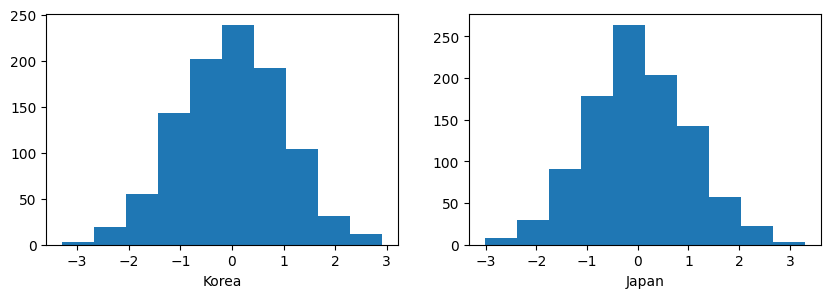

In [5]:
# 표준화된 데이터에 대한 히스토그램
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.hist(meat_consumption['한국인_정규화'])
plt.xlabel('Korea')

# 일본인 육류소비량 히스토그램
plt.subplot(122)
plt.hist(meat_consumption['일본인_정규화'])
plt.xlabel('Japan')
plt.show()

In [6]:
# 사이킷런 스케일러 이용 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption['한국인_정규화3'] = scaler.fit_transform(meat_consumption[['한국인']])
meat_consumption['일본인_정규화3'] = scaler.fit_transform(meat_consumption[['일본인']])

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3
0,57.956211,29.328622,0.755940,-0.907636,0.755940,-0.907636,0.755940,-0.907636
1,56.190045,32.384020,0.413850,-0.124064,0.413850,-0.124064,0.413850,-0.124064
2,55.722379,34.273509,0.323268,0.360504,0.323268,0.360504,0.323268,0.360504
3,52.893001,33.081545,-0.224757,0.054819,-0.224757,0.054819,-0.224757,0.054819
4,54.764061,28.336417,0.137650,-1.162092,0.137650,-1.162092,0.137650,-1.162092


##### 2-1-2. Min-Max 정규화

- Min-Max 정규화: (변수값 - 최소값)/(최대값 - 최소값)
  1. (x - np.min(x)) / (np.max(x) - np.min(x))
  2. sckit-learn 패키지의 MinMaxScaler(), minmax_scale()

In [7]:
# Min-Max변환 MinMaxScaler()함수 이용
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat_consumption['한국인_mm'] = scaler.fit_transform(meat_consumption[['한국인']])
meat_consumption['일본인_mm'] = scaler.fit_transform(meat_consumption[['일본인']])

meat_consumption[['한국인', '일본인', '한국인_mm', '일본인_mm']].head()

,한국인,일본인,한국인_mm,일본인_mm
0,57.956211,29.328622,0.652088,0.333906
1,56.190045,32.384020,0.596992,0.457938
2,55.722379,34.273509,0.582403,0.534640
3,52.893001,33.081545,0.494141,0.486253
4,54.764061,28.336417,0.552509,0.293628


In [8]:
# Min-Max변환 수식이용
Min = np.min(meat_consumption_korean)
Max = np.max(meat_consumption_korean)
meat_consumption['한국인_mm2'] = (meat_consumption[['한국인']] - Min) / (Max - Min)

Min = np.min(meat_consumption_japan)
Max = np.max(meat_consumption_japan)
meat_consumption['일본인_mm2'] = (meat_consumption[['일본인']] - Min) / (Max - Min)

meat_consumption[['한국인_mm', '일본인_mm', '한국인_mm2', '일본인_mm2']].head()

,한국인_mm,일본인_mm,한국인_mm2,일본인_mm2
0,0.652088,0.333906,0.652088,0.333906
1,0.596992,0.457938,0.596992,0.457938
2,0.582403,0.534640,0.582403,0.534640
3,0.494141,0.486253,0.494141,0.486253
4,0.552509,0.293628,0.552509,0.293628


#### 2-2. 정규분포변환

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/jamovi/r-datasets/master/data/USJudgeRatings.csv")
df.head()

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


- 왜도에 따른 변수 변환식
  1. 양수: sqrt(x) $\quad \quad \quad \quad \;$  log(x) $\quad \quad \quad \quad \; $ 1/x
  2. 음수: sqrt(max(x+1)-1) $\quad$  log(max(x+1)-1) $\quad$  1/(max(x+1)-1)

In [10]:
import scipy.stats as ss

# 지정한 컬럼의 왜도 계산
print(ss.skew(df['CONT']))
print(ss.skew(df['PHYS']))

1.0859724796276253
-1.5582154642293153


1. log() 변환

In [11]:
# 변수변환 - 로그변환
df['CONT1'] = np.log(df['CONT'])
df['PHYS1'] = np.log(np.max(df['PHYS'] + 1) - df['PHYS'])

# 왜도 계산
print(ss.skew(df['CONT1']))
print(ss.skew(df['PHYS1']))

0.6555571886692603
0.5824357748750443


2. log10() 변환

In [12]:
# 변수변환 - 로그변환
df['CONT1'] = np.log10(df['CONT'])
df['PHYS1'] = np.log10(np.max(df['PHYS'] + 1) - df['PHYS'])

# 왜도 계산
print(ss.skew(df['CONT1']))
print(ss.skew(df['PHYS1']))

0.6555571886692441
0.5824357748750438


#### 2-3. 범주화, 이산형화

73.5


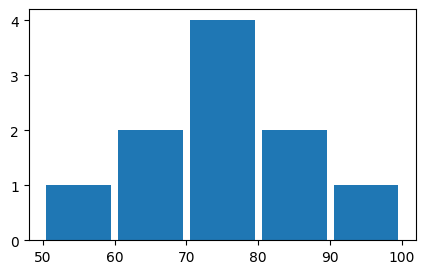

In [13]:
df = pd.DataFrame({'이름' : ['철수', '영희', '미영', '시완', '미경','영환','숙경','부영','민섭','보연'],
                   '수학점수' : [52,92,84,71,65,81,66,77,73,74]})

print(np.mean(df['수학점수']))

# 히스토그램, 범위 50~100, 5개 구간
plt.figure(figsize=(5,3))
plt.hist(df['수학점수'], bins=5, range=[50,100], rwidth=0.9)
plt.show()

##### 2-3-1. cut()

- pd.cut(x=데이터, bins=경계값리스트, labels=bin이름, include_lowest=True)
      - include_lowest=TRUE:  각 구간의 낮은 경계값을 포함 (a <= x < b)

In [14]:
df['등급'] = pd.cut(x=df['수학점수'],
                  bins=[0,60,70,80,90,100],
                  labels=['F','D','C','B','A'],
                  include_lowest=True)
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


##### 2-3-2. qcut()

- 나누고자 하는 범주 개수를 정해주면 각 범주에 균등한 수의 데이터가 채워지도록 범주를 나눔

In [15]:
df['등급_qcut'] = pd.qcut(x=df['수학점수'], q=5, labels = ['F','D','C','B','A'])

df

,이름,수학점수,등급,등급_qcut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,A
3,시완,71,C,D
4,미경,65,D,F
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,B
8,민섭,73,C,C
9,보연,74,C,C


### 3. 차원축소: PCA

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

# 연속형 변수와 범주형 변수 분리
df = iris.drop(['species'], axis = 1)
df_species = iris['species']

df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
# 변수 정규화 N(0,1)
from sklearn.preprocessing import StandardScaler

for x in df.columns:
  df[x] = StandardScaler().fit_transform(df[[x]])

df

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [18]:
# PCA 수행
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
p_score = pca.fit_transform(df)
print(p_score.shape)
print(pca.explained_variance_ratio_)

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


      - n_components: PCA로 변환할 차원의 수
      - pca.explained_variance_ratio_: 변환된 각각의 차원의 기여도 (첫번째 PCA 변환요소로 전체 변동성의 약 73% 설명 가능)

### 4. 결측치 처리

#### 4-1. 결측치 확인과 제거

In [19]:
# 데이터 셋에 결측치 확인
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

print(df.isnull().sum())

print(df.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

In [20]:
# 결측치가 있는 모든 행 제거
df_1 = df.dropna(axis = 0)

# Age열의 결측치가 있는 모든 행 삭제
df_2 = df.dropna(subset=['Age'], axis=0)
print(df_2.shape)

print(df_1.isnull().sum().sum())        # 데이터프레임 결측치 전체
df_1.shape                              # 데이터프레임 크기

(714, 12)
0


(183, 12)

#### 4-2. 결측치 대체

##### 4-2-1. 지정값으로 대체

In [21]:
# 결측치를 평균으로 대체
print(df['Age'].isnull().sum())
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace=True)
print(df['Age'].isnull().sum())

177
0


In [22]:
# 결측치를 최빈값으로 대체
print(df['Embarked'].isnull().sum())
Embarked_mode = df['Embarked'].mode()
df['Embarked'].fillna(Embarked_mode[0], inplace=True)
print(df['Embarked'].isnull().sum())

2
0


##### 4-2-2. 인접한 값으로 대체

- method='ffill': 결측치가 있는 행의 직전 행에 있는 값으로 대체
- method='bfill': 결측치가 있는 행의 바로 다음 행에 있는 값으로 대체

In [23]:
df['Embarked'].fillna(method='ffill', inplace=True)

##### 4-2-3. 그룹별 평균값으로 대체

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

print(df.groupby('Sex')['Age'].mean())
print(df.groupby('Pclass')['Age'].mean())

df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'), inplace=True)
df.tail()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75,NaN,Q


### 5. 이상치 처리

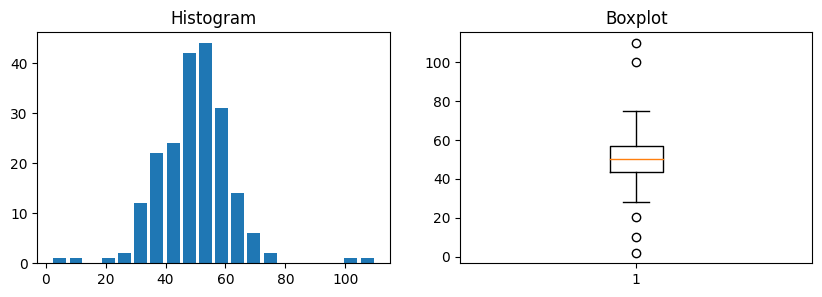

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = 10*np.random.randn(200) + 50
df = pd.DataFrame({'값': data})

# 임의의 이상치 삽입
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

# 분포 시각화
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.hist(df['값'], bins=20, rwidth=0.8)
plt.title('Histogram')

plt.subplot(122)
plt.boxplot(df['값'])
plt.title('Boxplot')
plt.show()

In [26]:
# 사분위범위 - quantile()
Q1 = df['값'].quantile(.25)
Q2 = df['값'].quantile(.5)
Q3 = df['값'].quantile(.75)
IQR = Q3 - Q1

print('Q1 =', Q1)
print('Q2 =', Q2)
print('Q3 =', Q3)
print('IQR =', IQR)

Q1 = 43.380308547740846
Q2 = 50.39620226624364
Q3 = 56.69433179275504
IQR = 13.31402324501419


In [27]:
# 사분위범위 - describe()
Q1 = df['값'].describe()['25%']
Q2 = df['값'].describe()['50%']
Q3 = df['값'].describe()['75%']
IQR = Q3 - Q1

print('Q1 =', Q1)
print('Q2 =', Q2)
print('Q3 =', Q3)
print('IQR =', IQR)

Q1 = 43.380308547740846
Q2 = 50.39620226624364
Q3 = 56.69433179275504
IQR = 13.31402324501419


- IQR = 3사분위수 - 1사분위수

- 이상치: (3사분위수 + IQR$*$1.5) 보다 큰 값이거나, (1사분위수 - IQR$*$1.5)보다 작은 값

In [28]:
print(df[df['값'] > (Q3 + IQR * 1.5)], '\n')

print(df[df['값'] < (Q1 - IQR * 1.5)])

         값
202  100.0
204  110.0 

             값
64   20.314157
201   2.000000
203  10.000000


### 6. 평활화

In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/lynx.csv")
df.drop(df.columns[0], axis=1, inplace=True)
print(df.head(10))
print(df.describe())

   time  value
0  1821    269
1  1822    321
2  1823    585
3  1824    871
4  1825   1475
5  1826   2821
6  1827   3928
7  1828   5943
8  1829   4950
9  1830   2577
              time        value
count   114.000000   114.000000
mean   1877.500000  1538.017544
std      33.052988  1585.843914
min    1821.000000    39.000000
25%    1849.250000   348.250000
50%    1877.500000   771.000000
75%    1905.750000  2566.750000
max    1934.000000  6991.000000


#### 6-1. 단순이동 평균

- rolling(n).mean(), n=데이터 개수

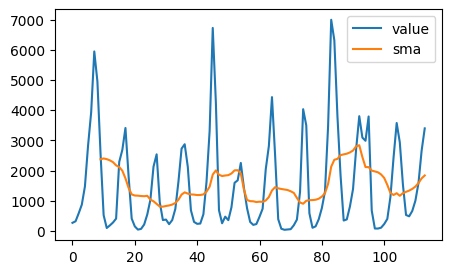

In [30]:
# 10년 단순이동평균
df['sma'] = df['value'].rolling(10).mean()

plt.figure(figsize=(5,3))
plt.plot(df['value'], label='value')
plt.plot(df['sma'], label='sma')
plt.legend()
plt.show()

#### 6-2. 지수가중이동평균

- ewm(n).mean(): 최근 데이터에 가중치를 부여하여 이동평균 구함

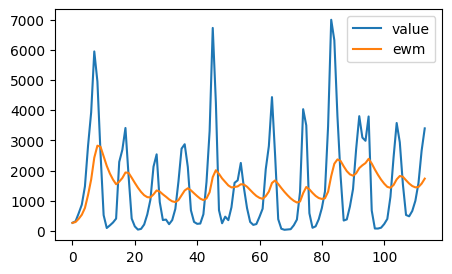

In [31]:
# 10년 지수가중이동평균
df['ewm'] = df['value'].ewm(10).mean()

plt.figure(figsize=(5,3))
plt.plot(df['value'], label='value')
plt.plot(df['ewm'], label='ewm')
plt.legend()
plt.show()